In [1]:
import sys
sys.path.append("../")

In [11]:
from typing import Tuple, Dict
from collections import defaultdict
from ds4400_final_project.dataset.common import train_and_evaluate_classifier, print_classifier_results, get_best_test_result, get_title_from_filename
from ds4400_final_project.dataset.common_plotting import plot_param_comparison_per_dataset
from sklearn.linear_model import LogisticRegression

In [3]:
# list of all solvers to try
solvers = ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
# list of all datasets to try
csv_files = ["features_3_sec.csv", "features_30_sec.csv"]

# { CSV_FILENAME: { SOLVER: ( TRAIN_ACC, TEST_ACC, FAILED_COUNT ) } 
results: Dict[str, Dict[str, Tuple]] = defaultdict(dict)

# iterate over all solvers
for solver in solvers:
	# iterate over all datasets
	for filename in csv_files:
		# construct the model
		classifier = LogisticRegression(solver=solver, max_iter=10000)

		# train and evaluate the model
		train_acc, test_acc, failed_count = train_and_evaluate_classifier(filename, classifier)
		results[filename][solver] = (train_acc, test_acc, failed_count)

In [12]:
# print all results from all models
for filename, result in results.items():
	for solver, (train_acc, test_acc, failed_count) in result.items():
		title = get_title_from_filename(filename)
		print_classifier_results(f"{title} ({solver})",
		                         train_acc, test_acc, failed_count)


Features 3 Sec (newton-cg)
Train accuracy: 74.11%
Train error:    25.89%
Test accuracy:  73.25%
Test error:     26.75%

| #   | Genre      | # of Incorrect | % of All Incorrect |
| --- |    ---     |      ---       |        ---         |
| 01  | ROCK       | 467            | 17.9%              |
| 02  | COUNTRY    | 355            | 13.6%              |
| 03  | REGGAE     | 341            | 13.0%              |
| 04  | DISCO      | 327            | 12.5%              |
| 05  | HIPHOP     | 324            | 12.4%              |
| 06  | BLUES      | 269            | 10.3%              |
| 07  | JAZZ       | 169            | 6.5%               |
| 08  | POP        | 167            | 6.4%               |
| 09  | METAL      | 145            | 5.5%               |
| 10  | CLASSICAL  | 51             | 2.0%               |
Features 3 Sec (lbfgs)
Train accuracy: 74.09%
Train error:    25.91%
Test accuracy:  73.25%
Test error:     26.75%

| #   | Genre      | # of Incorrect | % of All Incorrect

In [13]:
# print the results from the model with the best test accuracy
filename, solver, (train_acc, test_acc, failed_count) = get_best_test_result(results)
title = get_title_from_filename(filename)
print_classifier_results(f"Best Test Result: {title} ({solver})", train_acc, test_acc, failed_count)

Best Test Result: Features 3 Sec (newton-cg)
Train accuracy: 74.11%
Train error:    25.89%
Test accuracy:  73.25%
Test error:     26.75%

| #   | Genre      | # of Incorrect | % of All Incorrect |
| --- |    ---     |      ---       |        ---         |
| 01  | ROCK       | 467            | 17.9%              |
| 02  | COUNTRY    | 355            | 13.6%              |
| 03  | REGGAE     | 341            | 13.0%              |
| 04  | DISCO      | 327            | 12.5%              |
| 05  | HIPHOP     | 324            | 12.4%              |
| 06  | BLUES      | 269            | 10.3%              |
| 07  | JAZZ       | 169            | 6.5%               |
| 08  | POP        | 167            | 6.4%               |
| 09  | METAL      | 145            | 5.5%               |
| 10  | CLASSICAL  | 51             | 2.0%               |


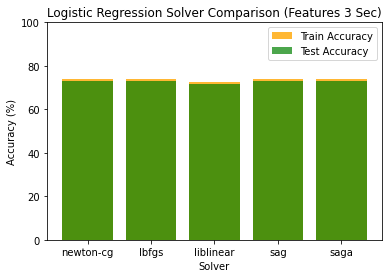

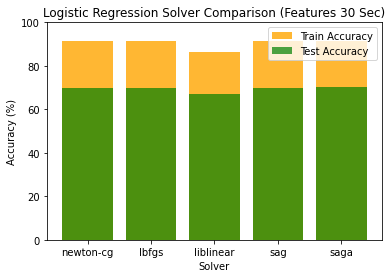

In [6]:
plot_param_comparison_per_dataset("Logistic Regression Solver Comparison", "Solver", results)